<a href="https://colab.research.google.com/github/AgustinAbo22/Razadeperros/blob/main/Razadeperros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 64 images belonging to 4 classes.
Found 16 images belonging to 4 classes.
Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.1633 - loss: 6.4583 - val_accuracy: 0.3125 - val_loss: 6.0277
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 14s 740ms/step - accuracy: 0.3095 - loss: 5.9136 - val_accuracy: 0.3750 - val_loss: 5.6100
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 18s 583ms/step - accuracy: 0.3249 - loss: 5.5140 - val_accuracy: 0.3750 - val_loss: 5.2589
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 717ms/step - accuracy: 0.1217 - loss: 5.1969 - val_accuracy: 0.4375 - val_loss: 4.9653
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 705ms/step - accuracy: 0.4162 - loss: 4.8732 - val_accuracy: 0.2500 - val_loss: 4.6848
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 22s 797ms/step - accuracy: 0.4636 - loss: 4.5791 - val_accuracy: 0.3750 - val_loss: 4.4693
Epoch 7/30
16/16 ━━━

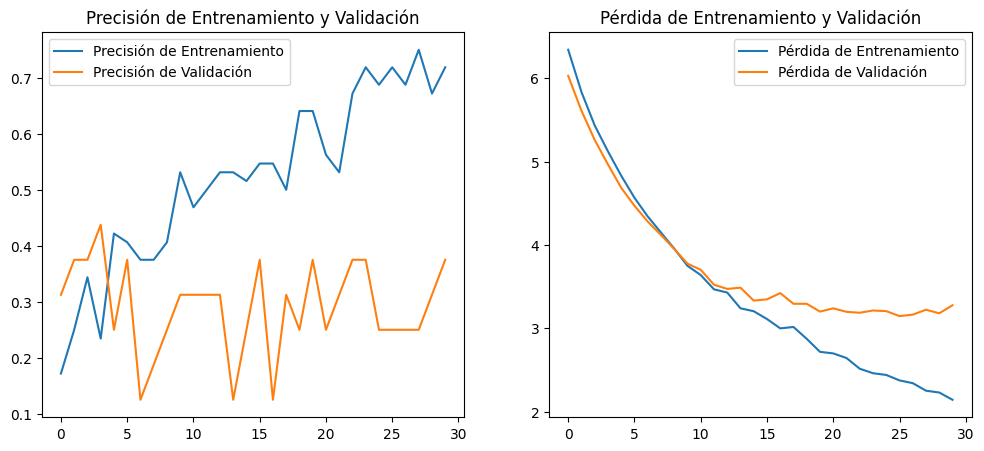

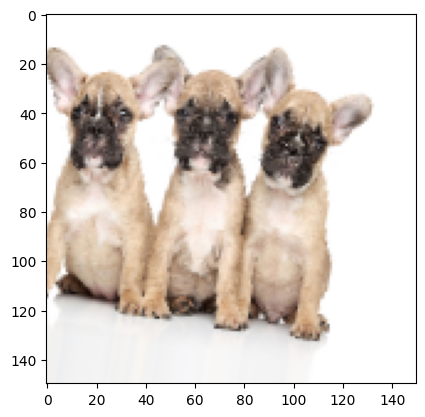

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Imagen 1:
  Raza predicha: french_bulldog
  Raza real: french_bulldog
------------------------------


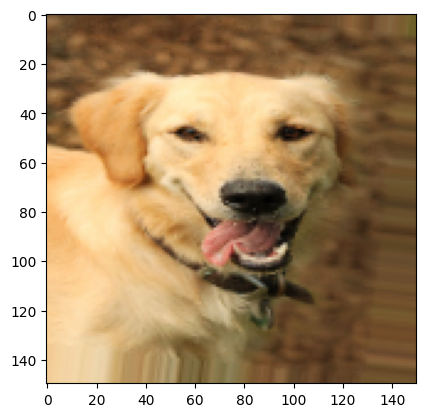

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Imagen 2:
  Raza predicha: poodle
  Raza real: golden_retriever
------------------------------


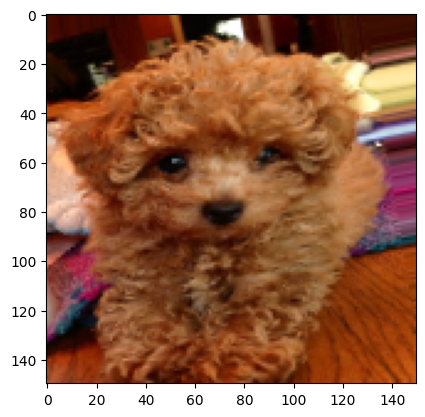

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Imagen 3:
  Raza predicha: poodle
  Raza real: poodle
------------------------------


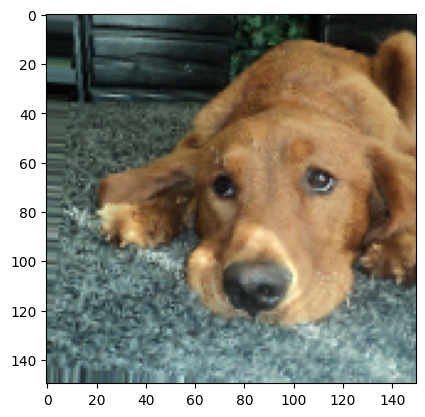

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Imagen 4:
  Raza predicha: golden_retriever
  Raza real: golden_retriever
------------------------------


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Aumento de datos simplificado
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Dividimos 80% entrenamiento y 20% validación
    rotation_range=10,  # Rotación leve
    width_shift_range=0.1,  # Desplazamiento horizontal pequeño
    height_shift_range=0.1,  # Desplazamiento vertical pequeño
    zoom_range=0.1,  # Zoom moderado
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest'
)

# Generadores de datos
train_generator = datagen.flow_from_directory(
    '/content/perros_imagenes',  # Ruta de las imágenes
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training'  # Entrenamiento
)

validation_generator = datagen.flow_from_directory(
    '/content/perros_imagenes',  # Ruta de las imágenes
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation'  # Validación
)

# Definir el modelo simplificado
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),  # Regularización para evitar sobreajuste
    layers.Dense(256, activation='relu', kernel_regularizer='l2'),  # Capa densa reducida
    layers.Dense(4, activation='softmax')  # 4 clases de perros
])

# Compilar el modelo
modelo.compile(optimizer=optimizers.Adam(learning_rate=0.00005),  # Learning rate ajustado
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Añadir callback de EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo
historial = modelo.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping]
)

# Guardar el modelo
modelo.save('/content/drive/MyDrive/mi_modelo_mejorado.h5')

# Visualizar precisión y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de Validación')
plt.legend()
plt.title('Precisión de Entrenamiento y Validación')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.title('Pérdida de Entrenamiento y Validación')

plt.show()

# Cargar imágenes y hacer predicciones sobre 4 imágenes
imagenes, etiquetas_reales = next(validation_generator)

for i in range(4):
    plt.imshow(imagenes[i])
    plt.show()

    prediccion = modelo.predict(imagenes[i:i+1])
    clase_predicha = prediccion.argmax(axis=-1)[0]

    etiquetas = validation_generator.class_indices
    etiquetas_invertidas = {v: k for k, v in etiquetas.items()}

    print(f"Imagen {i+1}:")
    print(f"  Raza predicha: {etiquetas_invertidas[clase_predicha]}")
    clase_real = etiquetas_reales[i].argmax()
    print(f"  Raza real: {etiquetas_invertidas[clase_real]}")
    print("------------------------------")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 128 images belonging to 4 classes.
Found 32 images belonging to 4 classes.
Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1880 - loss: 10.4683 - val_accuracy: 0.2500 - val_loss: 7.7504
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.3103 - loss: 7.0881 - val_accuracy: 0.4375 - val_loss: 5.4458
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.3780 - loss: 5.1135 - val_accuracy: 0.2500 - val_loss: 4.1945
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4070 - loss: 3.9864 - val_accuracy: 0.4375 - val_loss: 3.3739
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4133 - loss: 3.2571 - val_accuracy: 0.3750 - val_loss: 2.8961
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.4387 - loss: 2.7497 - val_accuracy: 0.3125 - val_loss: 2.6285
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━

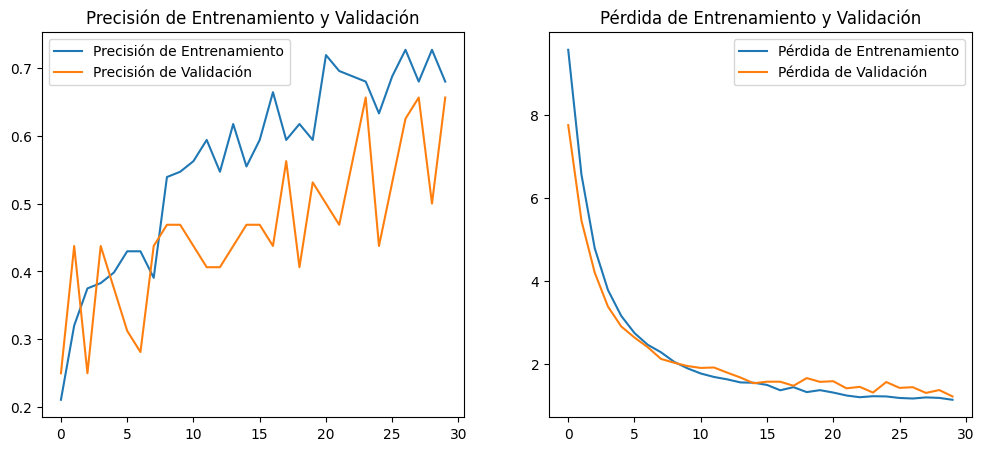

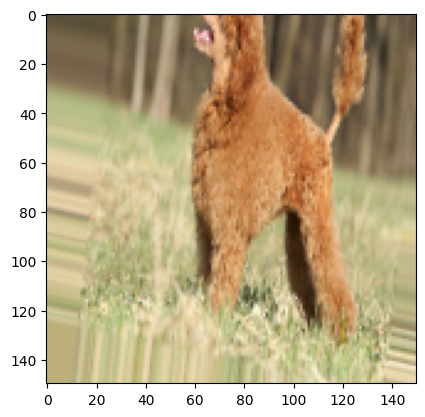

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
Imagen 1:
  Raza predicha: poodle
  Raza real: poodle
------------------------------


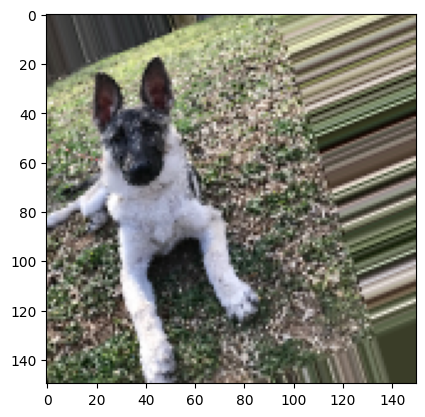

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Imagen 2:
  Raza predicha: german_shepherd
  Raza real: german_shepherd
------------------------------


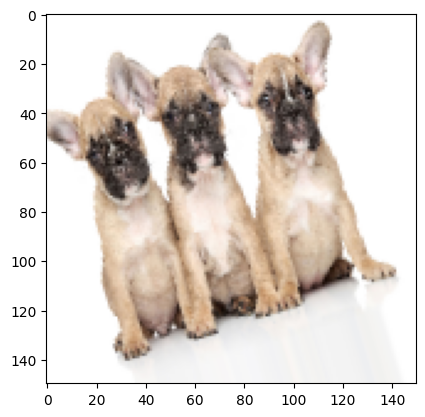

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Imagen 3:
  Raza predicha: german_shepherd
  Raza real: french_bulldog
------------------------------


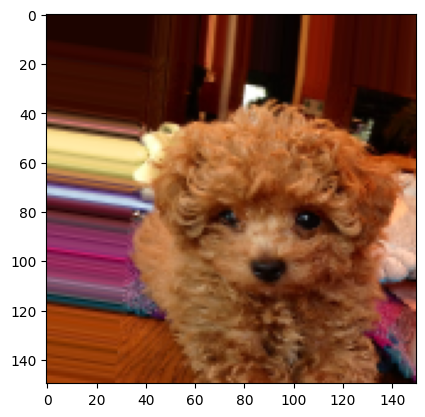

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Imagen 4:
  Raza predicha: poodle
  Raza real: poodle
------------------------------


In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
import zipfile
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping

# Montar Google Drive para acceder a los archivos
drive.mount('/content/drive')

# Aumento de datos para mejorar la variabilidad
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # Dividimos 80% entrenamiento y 20% validación
    rotation_range=20,  # Rotación aleatoria de las imágenes
    width_shift_range=0.2,  # Desplazamiento horizontal aleatorio
    height_shift_range=0.2,  # Desplazamiento vertical aleatorio
    shear_range=0.2,  # Inclinación aleatoria
    zoom_range=0.2,  # Zoom aleatorio
    horizontal_flip=True,  # Volteo horizontal
    fill_mode='nearest'  # Llenar los espacios vacíos resultantes
)

# Generadores de datos
train_generator = datagen.flow_from_directory(
    '/content/perros_imagenes',  # Ruta de las imágenes
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='training'  # Entrenamiento
)

validation_generator = datagen.flow_from_directory(
    '/content/perros_imagenes',  # Ruta de las imágenes
    target_size=(150, 150),
    batch_size=4,
    class_mode='categorical',
    subset='validation'  # Validación
)

# Definir el modelo
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),  # Regularización para evitar el sobreajuste
    layers.Dense(512, activation='relu', kernel_regularizer='l2'),
    layers.Dense(4, activation='softmax')  # 4 clases de perros
])

# Compilar el modelo
modelo.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Añadir callback de EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenar el modelo con EarlyStopping
historial = modelo.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=30,
    callbacks=[early_stopping]
)

# Guardar el modelo
modelo.save('/content/drive/MyDrive/mi_modelo_mejorado.h5')

# Visualizar precisión y pérdida
plt.figure(figsize=(12, 5))

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(historial.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(historial.history['val_accuracy'], label='Precisión de Validación')
plt.legend()
plt.title('Precisión de Entrenamiento y Validación')

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(historial.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(historial.history['val_loss'], label='Pérdida de Validación')
plt.legend()
plt.title('Pérdida de Entrenamiento y Validación')

plt.show()

# Cargar imágenes y hacer predicciones sobre 4 imágenes
imagenes, etiquetas_reales = next(validation_generator)

for i in range(4):
    plt.imshow(imagenes[i])
    plt.show()

    prediccion = modelo.predict(imagenes[i:i+1])
    clase_predicha = prediccion.argmax(axis=-1)[0]

    etiquetas = validation_generator.class_indices
    etiquetas_invertidas = {v: k for k, v in etiquetas.items()}

    print(f"Imagen {i+1}:")
    print(f"  Raza predicha: {etiquetas_invertidas[clase_predicha]}")
    clase_real = etiquetas_reales[i].argmax()
    print(f"  Raza real: {etiquetas_invertidas[clase_real]}")
    print("------------------------------")



